In [22]:
#Import libraries 
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Load the Data

In [7]:
#Read the data
csv_path = Path ("Resources/Refined Data Set.csv")
df_economy = pd.read_csv(csv_path, index_col="Time",header="infer")

#Display sample data
df_economy.head()

,GDP/capita growth (%),Access to electricity,Literacy rate (adult female),Literacy rate (youth female),Literacy rate (youth male),Literacy rate (adult male),Life expectancy at birth (female),Life expectancy at birth (\male),Primary school enrollment (net%),Labor force participation rate (female%),Labor force participation rate (male%),Net migration
Time,,,,,,,,,,,,
1993,2.357339,89.318225,85.145782,93.649338,91.902779,87.969719,72.065137,65.750388,91.70207,40.455670,71.564291,-799413
1994,3.575111,90.223083,85.700523,94.091949,92.659912,88.555008,72.408284,66.149040,91.17576,41.652467,71.242033,-727304
1995,-0.841473,88.599506,86.312340,94.521599,93.420387,88.824631,72.754166,66.425347,91.07574,42.849265,70.919774,-812708
1996,2.367651,89.557909,86.693207,94.821121,93.742462,89.099770,73.117666,66.802275,91.55162,42.556270,69.970452,-814722
1997,3.620615,90.015864,86.990997,94.866676,93.907623,89.505096,73.483913,67.154166,90.59165,43.339769,69.828303,-802462


## Data Relationship

<AxesSubplot:title={'center':'Correlation of the Metrics'}>

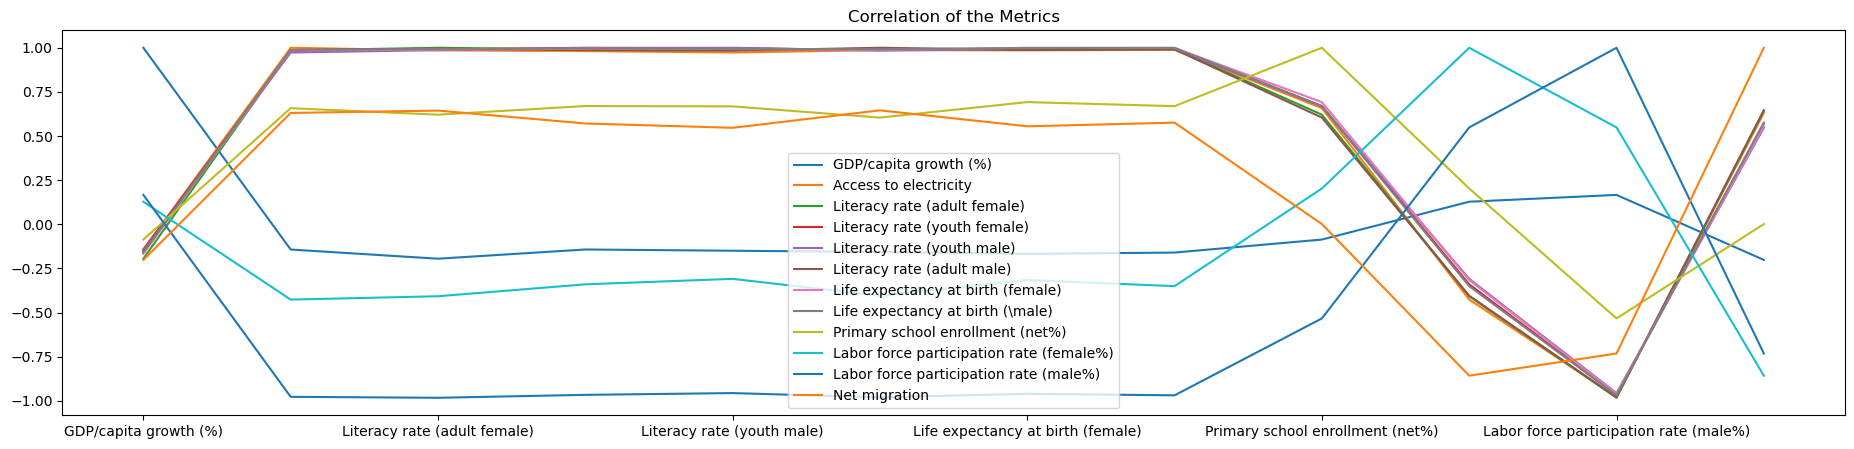

In [43]:
# Calculate and plot the correlation

correlation = df_economy.corr() 
correlation.plot(figsize=(23,5), title='Correlation of the Metrics')

# Model 1:  Multi-Variable Linear Regression Model

## Splitting data into training and testing sets

### Step 1: Using the `df_economy` DataFrame, separate the data into training and testing data. Start by defining the `target`and the `features` of the data.

In [33]:
# The target (dependent) variable is the GDP growth rate
y = df_economy["GDP/capita growth (%)"]

# The features columns are all the other features 
X = df_economy.drop(columns="GDP/capita growth (%)")

### Step 2: Split the features and target data into `training_features`, `testing_features`, `training_targets`, and `testing_targets` datasets by using the `train_test_split` function.

In [27]:
# Split the dataset using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(features, target)

### Step 1: Declare a Multi-Variable `LinearRegression` model.

In [12]:
# Declare a Linear regression model.
lr_model = linear_model.LinearRegression()

### Step 2: Fit the training data to the model, and save the model.

In [39]:
# Fit and save the logistic regression model using the training data
lr_model.fit(X_train, y_train)

LinearRegression()

## Predict the Testing data


### Step 1: Make predictions about GDP growth rate (%) by using the testing dataset, and save those predictions.

In [29]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_predictions = lr_model.predict(X_test)

# Review the predictions
y_predictions

array([-0.01471118,  0.88706603,  0.26188087,  0.49550626,  2.8990691 ,
        2.7459029 ,  1.36689279])

## Calculate the Performance Metrics

### Step 1: Calculate the metrics for the model 

In [38]:
# Compute the metrics for the model 

score = lr_model.score(X, y, sample_weight=None) 
r2 = r2_score(y_test, y_predictions) 
mse = mean_squared_error(y_test, y_predictions) 
rmse = np.sqrt(mse) 
std = np.std(y_test)

# Print the metrics for the model

print(f"The score is {score}.") 
print(f"The r2 is {r2}.") 
print(f"The mean squared error is {mse}.") 
print(f"The root mean squared error is {rmse}.") 
print(f"The standard deviation is {std}.")

The score is 0.29485709089643763.
The r2 is 0.5032236787003703.
The mean squared error is 3.608005725534283.
The root mean squared error is 1.8994751184299001.
The standard deviation is 2.6949652243702613.


In [ ]:
cdfb